 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Problema" data-toc-modified-id="Problema-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problema</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Librerías" data-toc-modified-id="Librerías-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Entendiendo-nuestro-DataFrame" data-toc-modified-id="Entendiendo-nuestro-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entendiendo nuestro DataFrame</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Funciones-específicas" data-toc-modified-id="Funciones-específicas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Funciones específicas</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Construyendo-el-modelo-predictivo" data-toc-modified-id="Construyendo-el-modelo-predictivo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Construyendo el modelo predictivo</a></span></li><li><span><a href="http://localhost:8888/notebooks/Churn_SKC.ipynb#Conclusiones" data-toc-modified-id="Conclusiones-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Creación modelo predictivo para la tasa de cancelación de clientes <a class="tocSkip">

##### Notebook por Alfredo Pasmiño

## Secciones<a class="tocSkip">

[1. Problema](#conclusion)
<a href='#librerias'>2. Librerías</a><br/>
<a href='#dataframe'>3. Entendiendo nuestro dataframe</a><br/>
<a href='#funciones'>4. Funciones específicas</a><br/>
<a href='#analisis'>5. Análisis exploratorio</a><br/>
<a href='#modelo'>6. Construyendo el modelo predictivo</a><br/>
<a href='#conclusion'>7. Conclusiones</a>

<a id='problema'></a>
# Problema

En SKC Maquinarias una de las métricas que se mide es la tasa de retención de clientes para el área de repuestos, pero como valor adicional se desarrolló un modelo predictivo el cual calcula cuál es la probabilidad que un cliente deje de comprar y cuanto se dejará de ganar por este concepto.
Esto nos servirá además para revertir los ingresos por venta de repuestos que van con tendencia a la baja.

<a id='librerias'></a>
# Librerías

In [2]:
#importamos las siguientes librerías
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, ShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, mean_squared_error, roc_curve, auc, classification_report, accuracy_score, make_scorer
from scipy import interp
from matplotlib.pyplot import *

<a id='dataframe'></a>
# Entendiendo nuestro DataFrame

Como primer paso Leemos el archivo con los datos, verificamos el tipo de dato de cada variable y visualizamos algunos estadísticas básicas del dataframe. para ello leerremos un archivo en formato txt como primera aproximación al modelo final en productivo.

In [3]:
#ruta del archivo con los datos
ruta='C:/Users/alfredo/Documents/Diplomado'

In [4]:
#nombre de las columnas
columns_name=['pk', 'sociedad', 'sector', 'ofvta', 'cod_cliente', 'nombre', 'vendedor', 'clas_fiscal', 
              'pedido', 'material', 'marca', 'linea', 'linea_o', 'id_pedido', 'costo', 'gr_mat', 'fecha',
              'fecha_2', 'ingreso', 'mesn', 'dia', 'mes', 'año', 'funica' ]

In [5]:
df=pd.read_csv(ruta+'/Query1.txt', sep=';', decimal=',', encoding = 'ISO-8859-1', names=columns_name, header=0)

In [6]:
#imprimimos las 5 primeras filas del dataframe
df.head()

,pk,sociedad,sector,ofvta,cod_cliente,nombre,vendedor,clas_fiscal,pedido,material,...,costo,gr_mat,fecha,fecha_2,ingreso,mesn,dia,mes,año,funica
0,1331712,CC07,S2,G04,150230,M.O.P. DIRECCION DE VIALIDAD,ST,ZF01,CONCEPCION,150897063,...,91.94,NaN,30/10/2015,2015.10.01 00:00:00,136.54,2015-10-01,30,10,2015,201510
1,1331717,CC07,S2,G92,233597,Maquinarias y Servicios Alianza Lim,ST,ZF01,IQUIQUE,151185911,...,0.00,NaN,30/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,30,10,2015,201510
2,1331699,CC07,S2,G04,71296,WTY_VOLVO BRASIL,ST,ZF01,CONCEPCION,151004930,...,0.00,NaN,19/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,19,10,2015,201510
3,1331701,CC07,S2,G10,150262,M.O.P. DIRECCION DE VIALIDAD,ST,ZF01,TALCA,151014216,...,0.00,NaN,30/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,30,10,2015,201510
4,1331724,CC07,S2,G14,263052,BRANDA SERVICIOS LIMITADA,ST,ZF01,SERENA,150902447,...,152.85,NaN,30/10/2015,2015.10.01 00:00:00,188.04,2015-10-01,30,10,2015,201510


In [8]:
#verificamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149302 entries, 0 to 149301
Data columns (total 24 columns):
pk             149302 non-null int64
sociedad       149302 non-null object
sector         149302 non-null object
ofvta          149302 non-null object
cod_cliente    149302 non-null object
nombre         149302 non-null object
vendedor       149302 non-null object
clas_fiscal    77062 non-null object
pedido         149295 non-null object
material       149299 non-null object
marca          149302 non-null object
linea          149302 non-null object
linea_o        149302 non-null object
id_pedido      143160 non-null object
costo          149302 non-null float64
gr_mat         144412 non-null object
fecha          149302 non-null object
fecha_2        149302 non-null object
ingreso        149302 non-null float64
mesn           149302 non-null object
dia            149302 non-null int64
mes            149302 non-null int64
año            149302 non-null int64
funica         149

Como tengo datos en formato "object" me interesa cambiarlos por formato "category", no solo es más eficiente computacionalmente ayudando a reducir el uso de memoria y en tiempo de ejecución del modelo.

In [10]:
#modificamos el formato de las siguientes variables a "category" para  ahorrar un poco más de memoria 
df[['sociedad','sector','ofvta','clas_fiscal','marca','linea','linea_o']]=df[['sociedad','sector','ofvta','clas_fiscal','marca'
                                                                              ,'linea',
                                                                              'linea_o']].apply(lambda x: x.astype('category'))

In [11]:
#transformo la fecha a formato date
df['Fecha_factura']=pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [12]:
#modifico el formato de los ingresos y costos
df[['ingreso', 'costo']] = df[['ingreso', 'costo']].apply(lambda x: x.astype(np.int64))

In [13]:
#elimino los registros con ingreso 0 en las filas (esto es un error del ERP)
df=df[df.ingreso != 0.0]

In [14]:
#imprimo estadísticos básicos de venta
df[['ingreso']].groupby(lambda x: df['Fecha_factura'][x].year).describe()

ingreso                                                               
        count        mean          std      min   25%   50%    75%       max
2015  36139.0  330.435513  1803.550249 -12579.0  33.0  89.0  253.0  166287.0
2016  38342.0  328.159851  1288.282513 -11942.0  27.0  88.0  253.0   64582.0

A pesar de que comparando el año 2015 con el 2016 existen más documentos facturados pero el promedio por factura es menor, a continuación veremos los ingresos por ventas mensuales.

In [15]:
#Calculamos el ingreso por mes
ingMensual=df[['Fecha_factura', 'ingreso']].groupby(['Fecha_factura']) ['ingreso'].sum()
ingMensual=pd.DataFrame(ingMensual.resample('M').sum())

In [16]:
%matplotlib inline

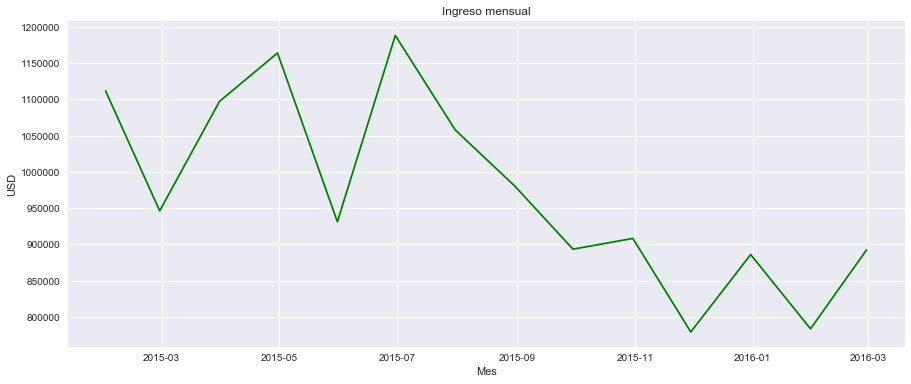

In [17]:
#graficamos el ingreso mensual
sns.set()
matplotlib.rcParams['figure.figsize'] = (15.0, 6.0)
plt.title('Ingreso mensual')
plt.ylabel('USD')
plt.xlabel('Mes')
plt.plot(ingMensual['2015-01':'2016-02'], color='green')
plt.show()

El gráfico muestra la caída en ingresos, especialmente desde a mediados del 2015, esto sin duda es una de las razones de que el índice de retención de clientes también se encuentre bajo.

In [18]:
#Calculamos los clientes con compra mencual
ClientesMensual=df.groupby('cod_cliente').apply(lambda x : x.set_index('Fecha_factura')
                                            .resample('M')
                                            .first()
                                            .interpolate()).reset_index(level=0, drop=True).reset_index()
ClientesMensual=ClientesMensual[['cod_cliente', 'Fecha_factura']].set_index('Fecha_factura')

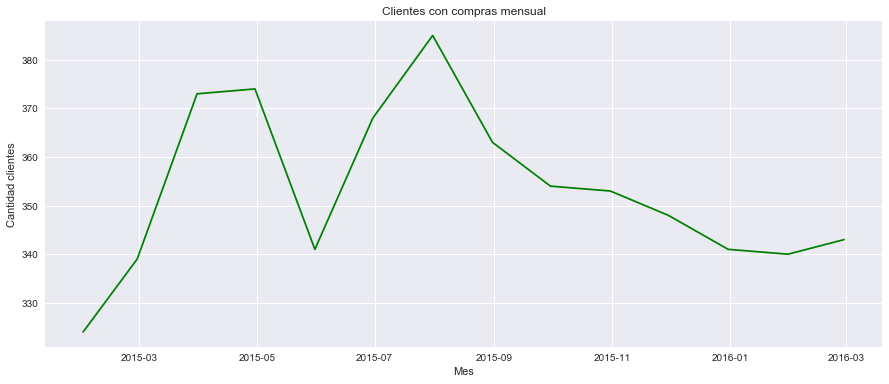

In [19]:
matplotlib.rcParams['figure.figsize'] = (15.0, 6.0)
plt.title('Clientes con compras mensual')
plt.ylabel('Cantidad clientes')
plt.xlabel('Mes')
plt.plot(ClientesMensual['2015-01':'2016-02'].groupby('Fecha_factura').count(), color='green')
plt.show()

El gráfico de cantidad de clientes únicos mensualmente tiene una forma muy similar a al gráfico de los ingresos se puede ver como tambien a partir de agosto empieza a disminuir la cantidad de clientes tocados, por esto surge la necesidad de clasificar que clientes pueden dejar de comprar para volver a "encantarlos".

Estimamos que un cliente no debría pasar de seis meses sin comprar repuestos por lo que dividimos el dataframe en dos, considerando los movimientos históricos de seis meses y un holdout de seis meses.

In [20]:
#selecciono fecha de la historia y el forecast
startDate_history = datetime.strptime('20150301', '%Y%m%d').date()
endDate_history=datetime.strptime('20150831', '%Y%m%d').date()

startDate_forecast = datetime.strptime('20150901','%Y%m%d').date()
endDate_forecast = datetime.strptime('20160229','%Y%m%d').date()

<a id='funciones'></a>
# Funciones específicas

Creamos algunas funciones que noa ayudaran a realizar operaciones complejas de data wrangling y que nos seviran más adelante.

La función getRFM recibe como parámteros el dataframe, la fecha inicial y la fecha final histórica, luego calcula la frecuencia de compra por cada cliente, así como el monto total, cuantos días han pasado desde 
su última compra y si utilizó servicio técnico.

In [21]:
def getRFM(dataFrame, sDate, eDate): 
    """
    Función que calcula la frecuencia, ingreso, la recencia de compra y si utilizó servicio técnico
    """
    #ordeno el dataframe por fecha descendiente
    dataFrame=dataFrame.sort_values(by='Fecha_factura', ascending=False)
    
    #filtro los datos segun la fecha histórica y los almaceno en un df temporal
    tmpdf=dataFrame[(dataFrame.Fecha_factura >= sDate) & (dataFrame.Fecha_factura <= eDate)]
    
    #elimino filas con los ID duplicados, asigno a una nuevo df modifico el indice para que sea los ID de cliente
    newdf=tmpdf.drop_duplicates(['cod_cliente']).set_index(['cod_cliente'])
    
    #calculo la recencia (días), menores días significa más reciente
    newdf['recency']=(eDate-newdf['Fecha_factura']).dt.days
    
    #calculo la frecuencia de compra   
    frecuency=tmpdf.groupby(['cod_cliente'] )['cod_cliente'].count()
    
    #join la variable frecuencia con newdf
    newdf=newdf.join(frecuency)
    
    #renombro las columnas
    newdf=newdf.rename(columns={'cod_cliente': 'frecuency'})
    
    #calculo el ingreso
    monetary=tmpdf.groupby(['cod_cliente'] )[['cod_cliente','ingreso']].sum()    
    newdf=newdf.merge(monetary, left_index=True,right_index=True)
    newdf=newdf.rename(columns={'ingreso_y': 'monetary'})    
    
    #calculo si utilizó servicio técnico
    tmpdf.is_copy = None
    tmpdf['servicio_tecnico']=tmpdf.sector.apply(lambda x: 1 if x=='S2' else 0)  
    sector=tmpdf.loc[:, ['cod_cliente','servicio_tecnico']].sort_values(by='servicio_tecnico', ascending=False)
    sector=sector.drop_duplicates(['cod_cliente'])
    sector=sector.set_index(['cod_cliente'])
    newdf=newdf.join(sector)   
    
    #returno un nuevo df con la recencia, frecuencia, ingreso y st
    return newdf

La función plotROC recibe como parámetros el modelo seleccionado, la variable "X" que son las variables independientes de nuestro modelo y la variable "y" la variable dependiente a predecir.

In [22]:
def plotROC(model, X, y):
    """
    Evalúo la performance del predictor con 5-fold cross-validation y gráfico la media del resultado de la curva ROC
    """
    cv = StratifiedKFold(n_splits=10, shuffle=True)
    classifier = model

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for train, test in cv.split(X, y):
        prob = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # calculo la curva de ROC y el AUC
        fpr, tpr, thresholds = roc_curve(y[test], prob[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        pred_churn = prob[:, 1]
        
    # gráfico la curva ROC
    plt.figure(figsize=(15,6))
    mean_tpr /= 10
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, '-', label='Promedio ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([0, 1.0])
    plt.ylim([0, 1.0])
    plt.xlabel('Falso positivo')
    plt.ylabel('Verdadero positivo')
    plt.legend(loc="lower right")
    plt.show()
    
    #retorno probabilidad para testing
    return pred_churn

In [23]:
def classificationReport(y_true, y_pred):
    """
    función que entrega el accuracy
    """
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    
    #retorno las métricas accuracy, precision, recall
    return accuracy_score(y_true, y_pred)

La función plot_classificationReport recibe como parámetros las métricas del reporte de clasificación basados en el score.

In [24]:
def plot_classificationReport(y_tru, y_prd, figsize=(10, 6), ax=None):
    
    """
    función que grafica las métricas precision, recall y f1 score
    """
    plt.figure(figsize=figsize)
    plt.title('Métricas modelo')
    xticks = ['Precision', 'Recall', 'f1-score']
    yticks=['Compra', 'No compra']
    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    
    sns.heatmap(rep[:,:-1], annot=True, cbar=True, xticklabels=xticks, yticklabels=yticks, ax=ax, cmap="RdBu")

La función plot_confusionMatrix recibe como parámetro de ingreso la variable "target" clasificadas en el modelo y la variable "prediction" que son las etiquetas en la muestra de testing.

In [25]:
def plot_confusionMatrix(targets, predictions, target_names=['Compra', 'No compra'], cmap="YlGnBu"):
    """
    Función que grafica la matriz de confusión
    """
    cm = confusion_matrix(targets, predictions)
 
    dfcm = pd.DataFrame(data=cm, columns=target_names, index=target_names)
    plt.figure(figsize=(10,6))
    plt.title('Matriz de confusión')
    
    sns.heatmap(dfcm, annot=True, fmt="d", linewidths=.5, cmap=cmap)

La función ChurnModel tiene como parámetros de ingreso el Dataframe histórico, el modelo seleccionado, las variables independientes "X" y la variable dependiente a predecir "y". retorna el dataframe histórico con la probabilidad de compra, la expectativa de pérdida y ganacia.

In [76]:
def ChurnModel(history, model, X, y):
    """
    Cálculo la tasa de cancelación de clientes y su perdida
    """
    # modelo
    clf = model
    clf = clf.fit(X,y)
    churn_prob = clf.predict_proba(X)
    history['churn_prob'] = churn_prob[:,0]
    
    # calculo la perdida
    history['expected_loss'] =(1- history['churn_prob']) * history['monetary']
    history['expected_buy'] = history['churn_prob'] * history['monetary']
    
    # retorno un df con la probabilidad, y la expectativa de perdida
    return history

In [27]:
#llamamos a la función getrfm
historia=getRFM(df, startDate_history, endDate_history)
pronostico=getRFM(df, startDate_forecast, endDate_forecast)

Construimos nuestra variable a predecir como "buy", para ello llenos con 0 categorizando clientes con "compra" y 1 como clientes "sin compra"

In [44]:
#nueva variable de compra, será la variable a predecir
historia['buy']=historia.index.isin(pronostico.index)
historia['buy']=historia['buy'].apply(lambda x: 0 if x==True else 1)

In [29]:
#proporción de los clientes que compran
compra_tab=pd.crosstab(historia['buy'], columns='count')
print(compra_tab)

col_0  count
buy         
0        585
1        319


In [45]:
#proporción de la variable compra
print(compra_tab/compra_tab.sum()) 

col_0     count
buy            
0      0.647124
1      0.352876


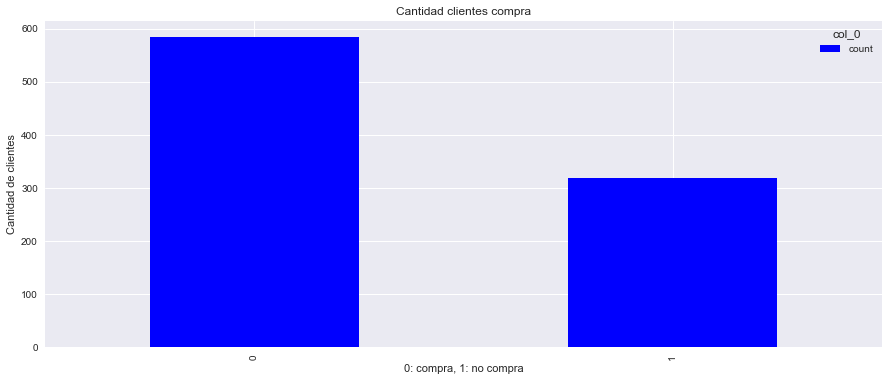

In [46]:
#graficamos la poporción de compra
compra_tab.plot(kind='bar', stacked=True, color=['blue'], grid=True)
plt.ylabel('Cantidad de clientes')
plt.xlabel('0: compra, 1: no compra')
plt.title('Cantidad clientes compra')
plt.show()

Con este histograma revisamos en que proporción se encuentran mis categorías, se interpreta que tengo aproximaamente un 65% de mis clientes que vuelve a comparar en un período de 6 meses y el restante se encuentra sin compras. con esto válido que no tengo una muestra desbalanceada para seguir con el análisis del modelo.

<a id='analisis'></a>
# Análisis exploratorio

Realizamos un análisis exploratorio gráficando las variables para ver si tienen outlaiers, que es lo más seguro especialmente en los clientes con grandes flotas de equipos

In [32]:
#estadísticos básicos de mis variables
historia[['recency', 'frecuency', 'monetary']].describe()

,recency,frecuency,monetary
count,904.000000,904.000000,904.000000
mean,57.429204,20.702434,7099.228982
std,51.489846,75.760836,33055.987565
min,0.000000,1.000000,-603.000000
25%,12.000000,2.000000,233.500000
50%,41.500000,5.000000,643.000000
75%,95.000000,13.000000,2526.250000
max,182.000000,1487.000000,542620.000000


Con los datos estadísticos básicos se puede interpretar que existen clientes con que tienen un mínimo de 0 días desde su última compra es decir su compra se encuentra en el límite inferior, así como el máximo corresponde a 182 días que es el extremo superior que considea los 6 meses de la muestra histórica, y el percentil 50 se encuentra con 42 días aproximadamente. La frecuencia considera un mínimo de 1 compra y el máximo de 1.487 compras, que debe ser interpretado como los grandes clientes flotistas y la mediana se encuentra en 5. En los ingresos se aprecia un -603 USD interpretandose como alguna nota de crédito, la mediana fue de 643 USD y el máximo de 542.620 USD que son como se menciono los grandes clientes. 

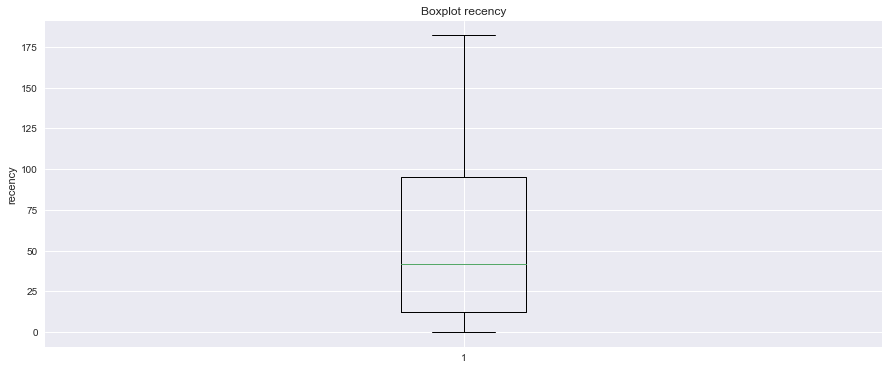

In [33]:
#boxplot recency
plt.boxplot(historia['recency'])
plt.title('Boxplot recency')
plt.ylabel('recency')
plt.show()

El Boxplot grafica los días que han pasado cada cliente desde su última compra, comprabamos visualmente que el mínimo es 0 el percentil 50 tiene 42 días, es decir el 50% de de la muestra han pasado 42 días desde su última compra y el máximo es de 182 días que es elprimer día desde la fecha de inicio del dataset.

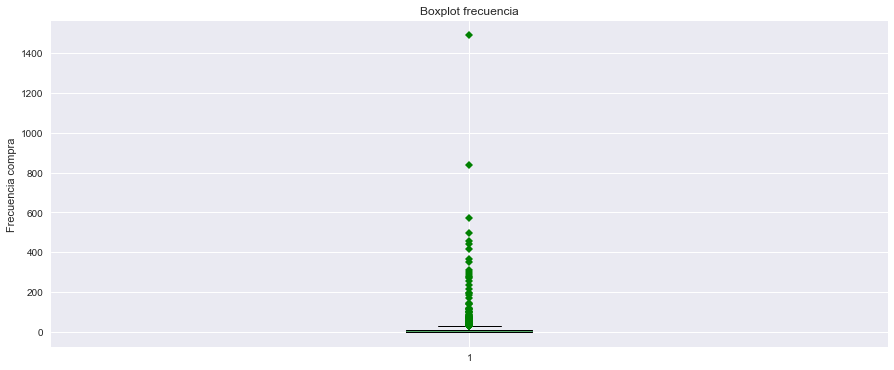

In [34]:
#gráfico frecuencia

plt.boxplot(historia['frecuency'], 0, 'gD')
plt.title('Boxplot frecuencia')
plt.ylabel('Frecuencia compra')
plt.show()

En el Boxplot de frecuencia se puede visualizar los outliers correspondientes a los grandes clientes flotistas y que en este problema no me interesa clasificar ya que tienen atención preferencial en SKC, probablemente si los eliminamos tendríamos un modelo con mejores resultados en sus métricas pero lo dejaremos para probar que tan robusto puede resultar el modelo final. 

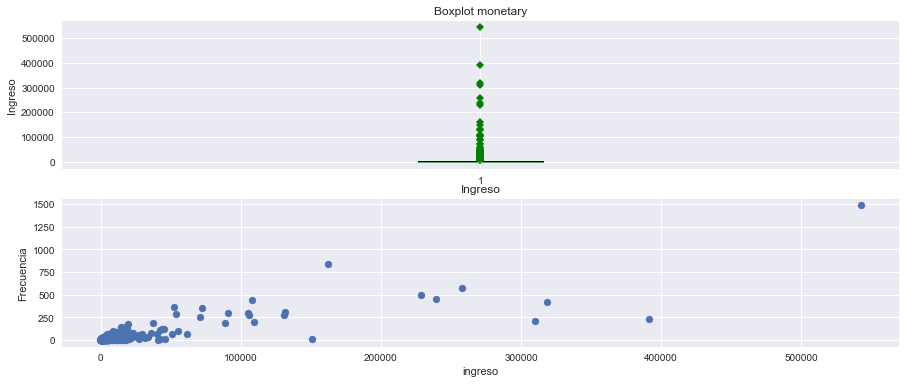

In [35]:
#gráfico monetary
plt.subplot(2, 1, 1)
plt.boxplot(historia['monetary'], 0, 'gD')
plt.title('Boxplot monetary')
plt.ylabel('Ingreso')

plt.subplot(2, 1, 2)
#sns.kdeplot(historia['monetary'])
plt.scatter(historia['monetary'], historia['frecuency'])
plt.title("Ingreso") 
plt.ylabel('Frecuencia')
plt.xlabel('ingreso')
plt.show()

El Boxplot de ingresos por clientes se aprecia al igual que el anterior gráfico los outliers y siguiendo la misma lógica caracterizada por algunos clientes, el scatter plot es otra forma de visualizar la frecuencia y los ingresos quedando de manifiesto como se alejan los puntos que considera que el 50% de estos clientes por concepto de ingreso debe haber aportado 643 USD con una frecuencia de compra de 5 veces en los últimos 6 meses.

<a id='modelo'></a>
# Construyendo el modelo predictivo

Comenzamos a construir nuestro modelo comparando modelos de caja blanca y caja negra, revisando cual entrega los mejores resultados. los modelos que utilizaremos serán regresión logística, máquinas de soporte vectorial y bosques aleatorios.

In [47]:
#selecciono las variables para construir el modelo
X=historia.loc[:, ['recency', 'frecuency', 'monetary', 'servicio_tecnico']]
y=historia.loc[:, 'buy']

In [48]:
#estandarizo las variables
seed = 10
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Prepararemos los modelos seleccionando sus parámetros (kernel, regularización, etc.) y para tener el mejor ajuste usaremos la función RandomsearchCV.

In [49]:
#preparo los modelos
param_grid_rf ={ 'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [None, 10,20]
    }

param_grid_svm = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]
              }
    
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [50]:
#seleccionamos el mejor parámetro para los bosques aleatorios
rf=RandomForestClassifier()
estimacion_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv= 5)
estimacion_rf.fit(X, y)
print (estimacion_rf.best_params_)

{'n_estimators': 700, 'max_features': 'auto', 'max_depth': 10}


In [51]:
#seleccionamos el mejor parámetro para svm
sv=SVC()
estimacion_svm = RandomizedSearchCV(estimator=sv, param_distributions=param_grid_svm, cv= 5)
estimacion_svm.fit(X, y)
print (estimacion_svm.best_params_)

{'kernel': 'linear', 'gamma': 0.02, 'C': 10}


In [41]:
#seleccionamos el mejor parámetro para regresión logística
lr=LogisticRegression()
estimacion_lr = RandomizedSearchCV(estimator=lr, n_iter=7,  param_distributions=param_grid_lr, cv= 5)
estimacion_lr.fit(X, y)
print (estimacion_lr.best_params_)

{'C': 0.001}


In [52]:
#guardo los modelos
modelos = []
modelos.append(('LR', LogisticRegression(C=0.001)))
modelos.append(('SVC', SVC(kernel= 'linear', gamma= 0.2, C= 10)))
modelos.append(('RF', RandomForestClassifier(n_estimators= 700, max_features= 'auto', max_depth= 10)))

Para evaluar el modelo usaremos como muestra de entrenamiento un 75% y de validación un 25%. Usaremos validación cruzada con 10 iteraciones con muestras al azar por cada iteración.

In [53]:
#evalúo el modelo

resultados=[]
nombres=[]
scoring = 'accuracy'
originalclass = []
predictedclass = []

for nombre, modelo in modelos:
    shuffle_split = ShuffleSplit(test_size=.25, n_splits=10, random_state=seed)
    cv_resultados = cross_val_score(modelo, X, y, cv=shuffle_split, scoring=make_scorer(classificationReport))
    resultados.append(cv_resultados)
    nombres.append(nombre)
    msg = ("%s %f (%f)" % (nombre, cv_resultados.mean(), cv_resultados.std()))
    print(msg)

LR 0.709735 (0.025587)
SVC 0.719027 (0.025206)
RF 0.719912 (0.024159)


El resultado de los modelos tenemos que el mejor accuracy lo entrega los bosques aleatorios con un 71,9% aproximado de acierto correctos, en segundo lugar se encuentra la SVM y por último la regresión logistica, al no haber una gran diferencia a nivel porcentual revisaremos otras métricas para tomar la decisión final de selección.

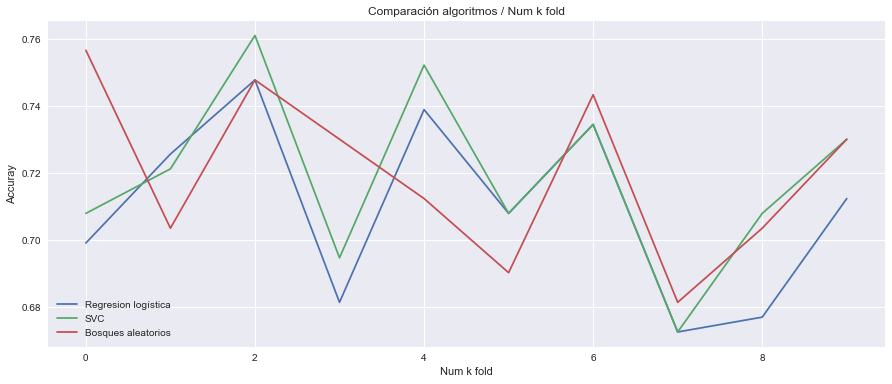

In [54]:
#graficamos el acuracy en los 10 k fold-cross validation
plt.plot(resultados[0], label='Regresion logística')
plt.plot(resultados[1], label='SVC')
plt.plot(resultados[2], label='Bosques aleatorios')
plt.ylabel('Accuray')
plt.xlabel('Num k fold')
plt.title('Comparación algoritmos / Num k fold')
plt.legend(loc=3)
plt.show()

El gráfico muestra el accuracy y como se comporta en las 10 iteraciones considerando la validación cruzada, además se puede apreciar que no siempre en cada fold los bosuqes otienen los mejores resultado pero en el promedio es superior a los otros algorimos.

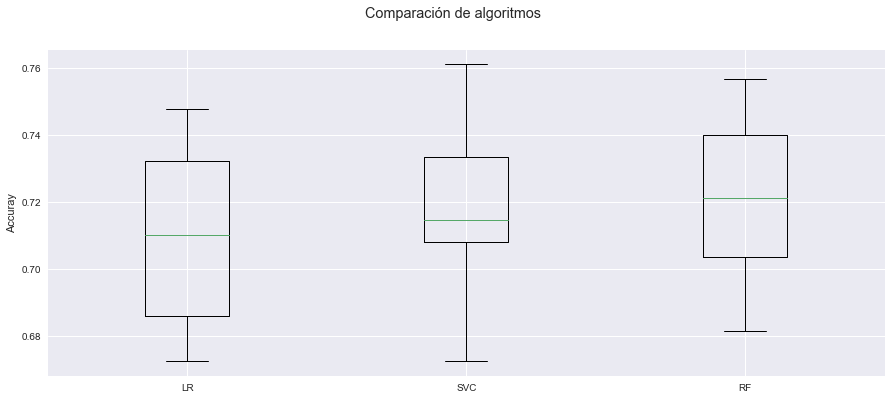

In [56]:
#graficamos los resultados de los tres modelos
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.ylabel('Accuray')
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

Los mejores resultados los entrega el modelo de bosques aleatorios como revisamos anteriormente donde en promedio el accuracy fue de un 71.9%, revisaremos otras metricas para evaluar con que modelo trabajaremos la parte final del modelo.

             precision    recall  f1-score   support

          0       0.75      0.83      0.79      1482
          1       0.60      0.48      0.53       778

avg / total       0.70      0.71      0.70      2260



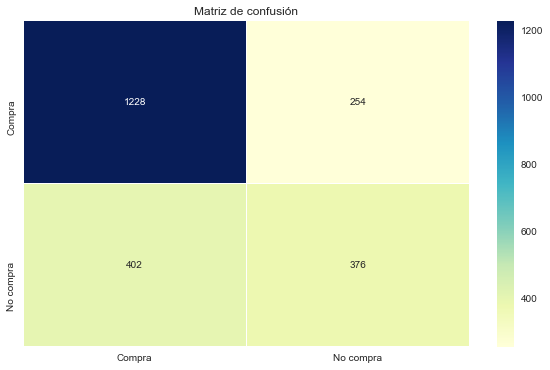

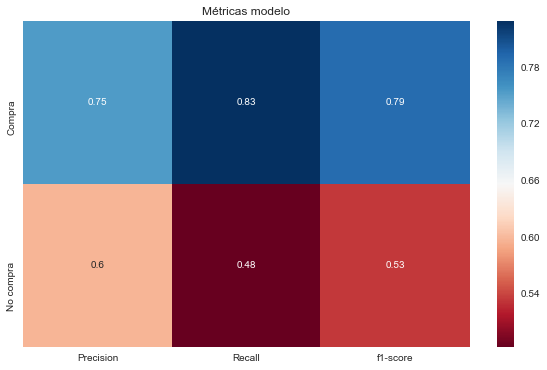

In [57]:
#revisamos las metricas: precision, recall, f1-score y support 
nClass=[] 
for i in range(0, len(modelos)+1):         
    nClass.append(len(originalclass)/(len(modelos))*i )
    i=+1

#métricas de regresión logística
%matplotlib inline

plot_confusionMatrix(originalclass[int(nClass[0]):int(nClass[1])], predictedclass[int(nClass[0]):int(nClass[1])])

classificationReport=(classification_report(originalclass[int(nClass[0]):int(nClass[1])], 
                                            predictedclass[int(nClass[0]):int(nClass[1])]))

print((classificationReport))

plot_classificationReport(originalclass[int(nClass[0]):int(nClass[1])], predictedclass[int(nClass[0]):int(nClass[1])])

Al revisar las métricas de la matriz de confusión el modelo predijo que en 10 iteraciones 1228 clientes que compran fueron correctamete clasificados es decir son los verdaderos positivos y fueron mal clasificados 254 clientes como falso negativo. los verdaderos negativo que son 376 clientes clasificados correctamente como "no compran" y los falsos positivos son 402 clientes mal clasificados.
la exactitud total del modelo (overall accuracy) corresponde: $(Verdaderos\space positivo + Verdaderos\space negativo)/\space Total$.
Resultando un 70.9%. resultado que revisamos en el paso anterior al comprar cada modelo.

La otras métricas son precision que es el ratio de como clasificó correctamente observaciones positivas es decir $Verdaderos\space positivos / (Verdaderos\space positivos + Falsos\space positivos)$ en este caso es de 75%.
Recall es otro ratio que mide los eventos clasificados positivamente como $Verdaderos\space positivos / (Verdaderos\space positivos + Falsos\space negativos)$ en este caso es de 83%.

             precision    recall  f1-score   support

          0       0.76      0.84      0.80      1482
          1       0.62      0.48      0.54       778

avg / total       0.71      0.72      0.71      2260



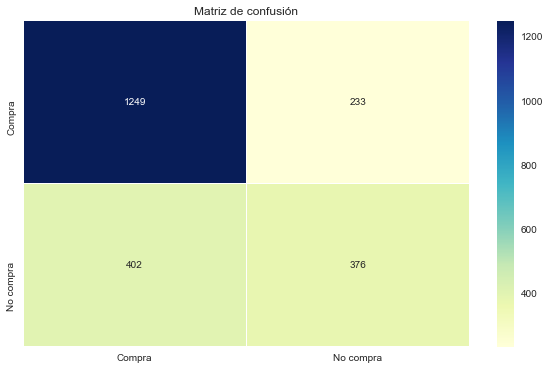

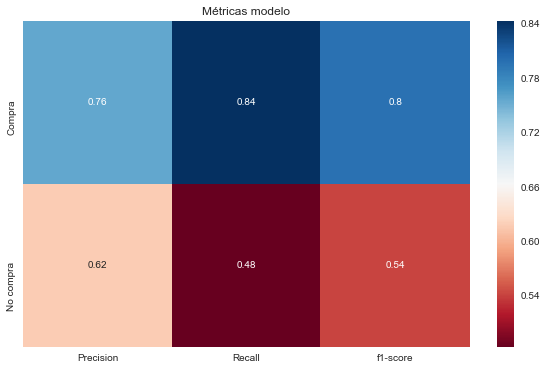

In [58]:
#métricas de SVM
plot_confusionMatrix(originalclass[int(nClass[1]):int(nClass[2])], predictedclass[int(nClass[1]):int(nClass[2])])

classificationReport=classification_report(originalclass[int(nClass[1]):int(nClass[2])], 
                                           predictedclass[int(nClass[1]):int(nClass[2])])
print(classificationReport)
plot_classificationReport(originalclass[int(nClass[1]):int(nClass[2])], predictedclass[int(nClass[1]):int(nClass[2])])

La matriz de confusión el modelo de SVM predijo en 10 iteraciones que 1249 clientes que compran fueron correctamete clasificados es decir son los verdaderos positivos y fueron mal clasificados 233 clientes como falso negativo. los verdaderos negativo que son 402 clientes clasificados correctamente como "no compran" y los falsos positivos son 376 clientes mal clasificados. la exactitud total del modelo (overall accuracy) corresponde a 71,9%. la precision es de 76% y recall de 84%. El resultado es mucho mejor comparandolo con la regresión logistica.

             precision    recall  f1-score   support

          0       0.78      0.80      0.79      1482
          1       0.60      0.56      0.58       778

avg / total       0.72      0.72      0.72      2260



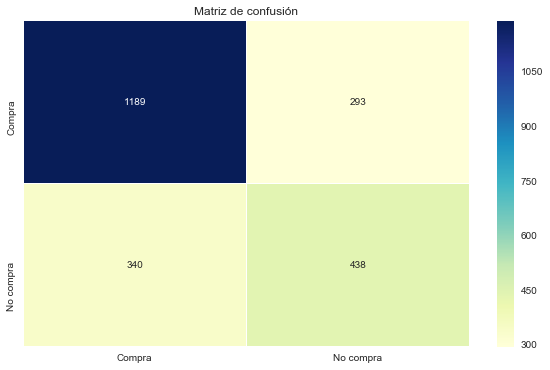

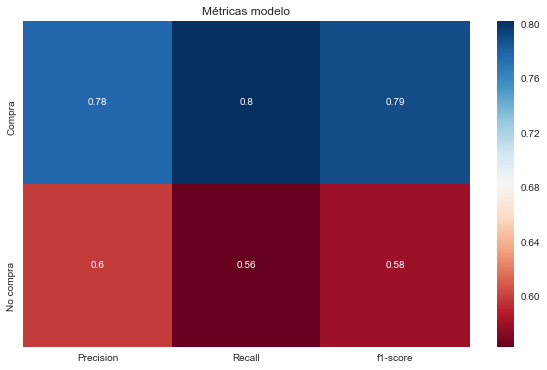

In [59]:
#métricas de bosques aleatorios
plot_confusionMatrix(originalclass[int(nClass[2]):int(nClass[3])], predictedclass[int(nClass[2]):int(nClass[3])])

classificationReport=classification_report(originalclass[int(nClass[2]):int(nClass[3])], 
                                           predictedclass[int(nClass[2]):int(nClass[3])])
print(classificationReport)
plot_classificationReport(originalclass[int(nClass[2]):int(nClass[3])], predictedclass[int(nClass[2]):int(nClass[3])])

La matriz de confusión el modelo de bosques aleatorios predijo en 10 iteraciones que 1189 clientes que compran fueron correctamete clasificados es decir son los verdaderos positivos y fueron mal clasificados 293 clientes como falso negativo. los verdaderos negativo que son 340 clientes clasificados correctamente como "no compran" y los falsos positivos son 438 clientes mal clasificados. la exactitud total del modelo (overall accuracy) corresponde a 71.9%. la precision es de 78% y recall de 80%. si lo comparamos con el modelo de SVM los verdaderos positivos y el recall son menores pero clasifica mucho mejor los clientes que no compran por eso en el overall es un mejor modelo y el que finalmente uilizaremos.

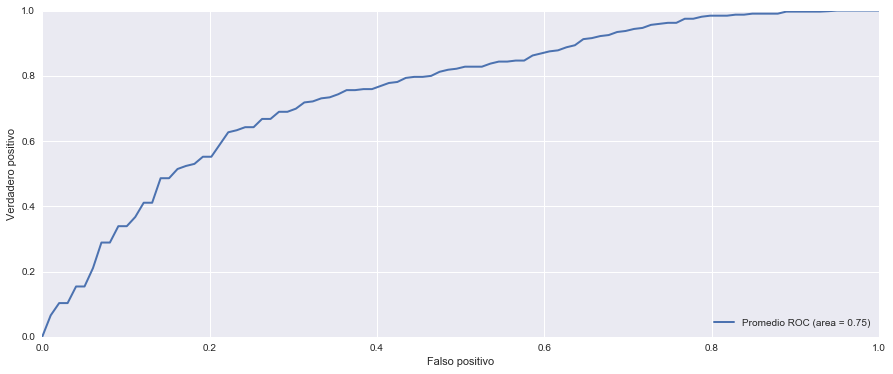

In [62]:
proba=plotROC(modelos[2][1], X, y)

Otra métrica para evaluar el modelo es la curva de ROC y el área bajo la curva, este este gráfico es la representación de la razón o ratio de verdaderos positivos (VPR = Razón de Verdaderos Positivos) frente a la razón o ratio de falsos positivos (FPR = Razón de Falsos Positivos) así tenemos el umbral de clasificación el resultado obtenido es de 75% que significa la capacidad para discriminar entre las dos clases que tenemos y es mucho mejor que dejarlo al azar que sería equivalente a un 50%.

In [77]:
#calculamos la predicción del modelo final
proba=ChurnModel(historia,modelos[2][1], X, y)

In [79]:
historia[['churn_prob', 'expected_loss', 'expected_buy']].head()

,churn_prob,expected_loss,expected_buy
cod_cliente,,,
233597,0.999959,2.953551,72359.046449
224463,0.999959,4.450694,109037.549306
210412,0.995652,308.980158,70761.019842
151139,0.980581,251.847032,12717.152968
232443,0.999959,22.147755,542597.852245


<a id='conclusion'></a>
# Conclusiones

Considerando que nuestro dataset y como revisamos tiene valores atípicos debido a clientes con grandes flotas, clientes que compran gran cantidad pero por concepto de remates, devoluciones a fabrica, etc. los resultados de los tres modelos de clasificación que usamos nos entrega en promedio un 75% como capacidad para discriminar basado en el AUC o área bajo la curva de ROC como métrica final para evaluar el modelo, así podemos obtener la probabilidad de compra y en nuestro caso no nos interesa los cliente con probabilidades cercanas a 1 ya que estos por lo general tienen vendedores a terrenos o personalizados, nos interesa los clientes bajo un 70% ya que estos no son visitados por la fuerza de venta y lo ideal es realizar el primer contacto vía contact center.
Luego de tener los resultados se almacenan estos en una base de datos para posteriormente tener un reporte mensual de la evolución de cada cliente y llevar un seguimiento en aquellos clientes que se seleccionaron para hacer el contacto.